In [10]:
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

import bs4 as bs
import pickle
import requests
style.use('ggplot')


In [11]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:

start=dt.datetime(2000,1,1)
end=dt.datetime(2016,12,31)

#df=web.DataReader('TSLA','yahoo',start,end)
#print(df.tail())

In [3]:
#df.to_csv('TSLA.csv')

In [4]:
df=pd.read_csv('TSLA.csv',index_col=0,parse_dates=True)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [6]:
df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()

In [7]:
#ax1=plt.subplot2grid((6,1),(0,0),rowspan=4,colspan=1)
#ax2=plt.subplot2grid((6,1),(4,0),rowspan=2,colspan=1,sharex=ax1)
#ax1.plot(df.index,df['Adj Close'])
#ax1.plot(df.index,df['100ma'])
#ax2.bar(df.index,df.Volume)

In [8]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc)

         Date       open       high        low      close
0    733952.0   4.778000   4.778000   3.160000   3.492000
1    733962.0   3.480000   4.128000   3.410000   4.128000
2    733972.0   4.382000   4.382000   4.044000   4.144000
3    733982.0   4.070000   4.390000   3.918000   3.918000
4    733992.0   3.920000   3.920000   3.520000   3.830000
..        ...        ...        ...        ...        ...
233  736282.0  36.290001  38.627998  36.290001  38.627998
234  736292.0  39.330002  39.330002  36.293999  36.293999
235  736302.0  37.360001  39.630001  37.169998  39.630001
236  736312.0  39.737999  42.667999  39.515999  42.667999
237  736322.0  43.905998  43.948002  42.737999  42.737999

[238 rows x 5 columns]


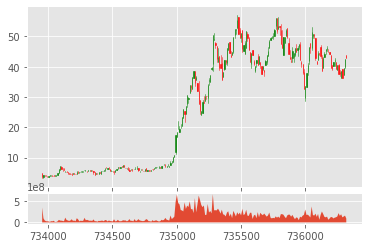

In [9]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values)

In [6]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('\n',"")
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker) 
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

ticker replaced to BRK-B
ticker replaced to BF-B


['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'